In [ ]:
include("./tools.jl")
using Plots
colorbar = cgrad(:linear_tritanopic_krjcw_5_98_c46_n256, rev = true);

1.
1D Hubbard model with 2 sites in one cluster, perserved particle number(particle number=2 per cluster)

$$\hat{H} = t\sum_{i,j}c^\dagger_{i\sigma}c_{j\sigma} + U\sum_{i\sigma}c^\dagger_{i\sigma}c_{i\sigma}c^\dagger_{i\bar{\sigma}}c_{i\bar{\sigma}}\quad \hat{H} = \hat{H}' $$

  0.000889 seconds (3.52 k allocations: 795.422 KiB)


  0.327296 seconds (4.12 M allocations: 581.506 MiB, 22.91% gc time)


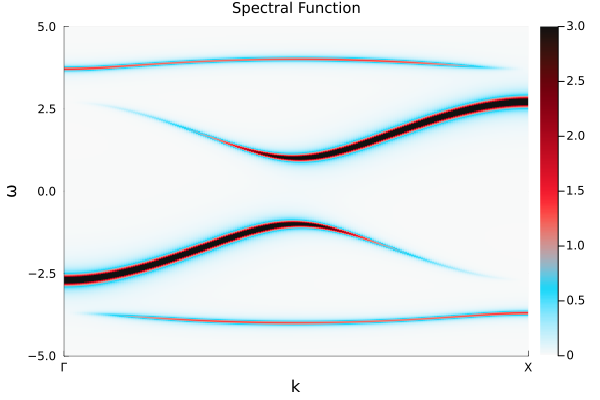

In [16]:
unitcell = Lattice([0, 0]; vectors=[[1, 0]])
cluster = Lattice(unitcell, (2,), ('p',))
hilbert = Hilbert(site=>Fock{:f}(1, 2) for site=1:length(cluster))
bs= Sector(hilbert, ParticleNumber(2))
t = Hopping(:t, -1.0, 1)
U = Hubbard(:U, 4.0)
origiterms = (t, U)
referterms = (t, U)
@time vca = VCA(:N, unitcell, cluster, hilbert, origiterms, referterms, bs)
k_path = ReciprocalPath(reciprocals(unitcell.vectors), line"Γ-X", length=200)
ω_range = range(-5, 5, length=300)
@time G = singleParticleGreenFunction(:f, vca, k_path, ω_range; μ=2.0)
A = spectrum(G)
f = plot(k_path, ω_range, A; xlabel="k", ylabel="ω", color=colorbar , title="Spectral Function",clims=(0, 3))

2D Hubbard model with 4 sites in one cluster
$$t=-1.0,\quad U=4.0$$

  0.002764 seconds (8.94 k allocations: 2.371 MiB)


  0.881329 seconds (11.59 M allocations: 1.934 GiB, 21.08% gc time)


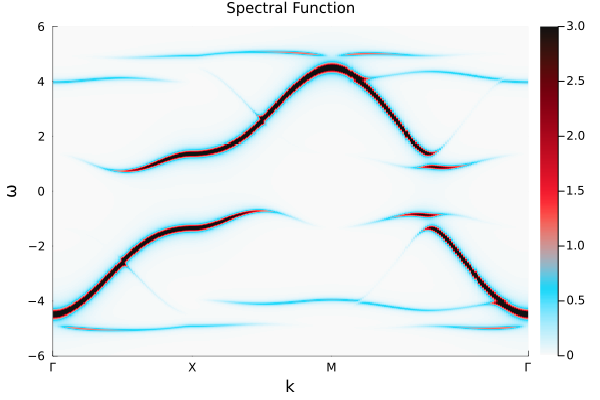

In [19]:
unitcell = Lattice([0, 0]; vectors=[[1, 0], [0, 1]])
cluster = Lattice(unitcell, (2,2), ('p','p'))
hilbert = Hilbert(site=>Fock{:f}(1, 2) for site=1:length(cluster))
bs = Sector(hilbert, SpinfulParticle(4, 0.0))
t = Hopping(:t, -1.0, 1)
U = Hubbard(:U, 4.0)
origiterms = (t, U)
referterms = (t, U)
neighbors = Neighbors(0=>0.0, 1=>1.0)
@time vca = VCA(:N, unitcell, cluster, hilbert, origiterms, referterms, bs)
k_path = ReciprocalPath(reciprocals(unitcell.vectors), rectangle"Γ-X-M-Γ", length=100)
ω_range = range(-6, 6, length=300)
@time G = singleParticleGreenFunction(:f, vca, k_path, ω_range; μ=2.0)
A = spectrum(G)
f = plot(k_path, ω_range, A; xlabel="k", ylabel="ω", color=colorbar, title="Spectral Function",clims=(0, 3))

$$ 
\sum_{i\sigma}\left(tc^\dagger_{i,\sigma}c_{i+1,\sigma}+\mu c^\dagger_{i,\sigma}c_{i,\sigma} + \frac{\Delta}{2}(c^\dagger_{i,\sigma}c^\dagger_{i,\bar{\sigma}}+ H.c.)\right)\\
t=-1.0,\quad\Delta=0.3,\quad \mu=-0.5
$$

  1.306015 seconds (3.20 M allocations: 204.178 MiB, 4.68% gc time, 99.33% compilation time)


  2.771459 seconds (28.85 M allocations: 4.793 GiB, 18.50% gc time, 6.22% compilation time)


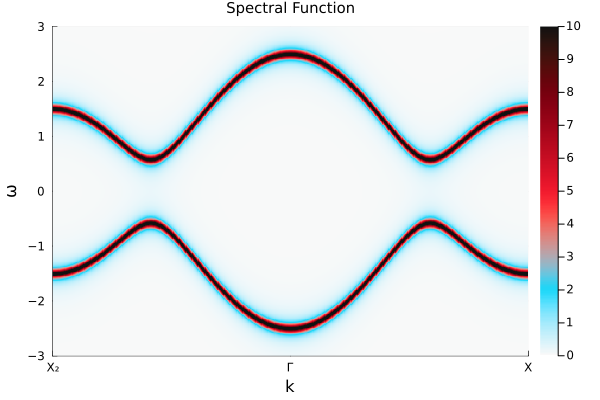

In [20]:
unitcell = Lattice([0, 0]; vectors=[[1, 0]])
cluster = Lattice(unitcell, (2,), ('p',))
hilbert = Hilbert(site=>Fock{:f}(1, 2) for site=1:length(cluster))
bs = Sector(hilbert, SpinfulParticle(NaN, 0.0))
t = Hopping(:t, -1.0, 1)
coupling=Coupling(Index(:, FID(1, 1//2, 1)), Index(:, FID(1, -1//2, 1))) + Coupling(Index(:, FID(1, -1//2, 1)), Index(:, FID(1, 1//2, 1)))
p = Pairing(:p, 0.3, 1, coupling/2;amplitude = phase_by_azimuth([(0, 2π), (π,)], [1.0, -1.0]))
μ = Onsite(:μ, -0.5)
origiterms = (t, μ, p)
referterms = (t, μ, p)
neighbors = Neighbors(0=>0.0, 1=>1.0)
@time vca = VCA(:A, unitcell, cluster, hilbert, origiterms, referterms, bs)
k_path = ReciprocalPath(reciprocals(unitcell.vectors), line"X₂-Γ-X", length=200)
ω_range = range(-3, 3, length=400)
@time G = singleParticleGreenFunction(:f, vca, k_path, ω_range)
A = spectrum(G)
c1 = plot(k_path, ω_range, A; xlabel="k", ylabel="ω", color=colorbar , title="Spectral Function",clims=(0, 10))

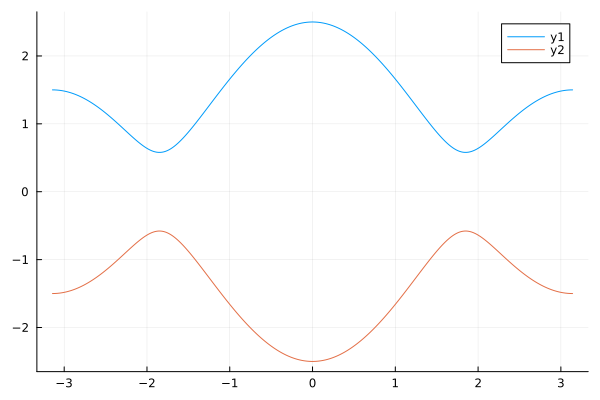

In [30]:
function PxWaveSpectrum(t, Δ, μ, k)
    ep, pm, pp = 2t*cos(k) + μ, -2im*sin(k), 2im*sin(k)
    xi = √(ep^2 + (pm*pp)*Δ^2)
    return (xi, -xi)
end
y1 = Real.([PxWaveSpectrum(-1.0, 0.3, -0.5, k)[1] for k in range(-π,π,length=300)])
y2 = Real.([PxWaveSpectrum(-1.0, 0.3, -0.5, k)[2] for k in range(-π,π,length=300)])
plot(range(-π,π,length=300), y1)
plot!(range(-π,π,length=300),y2)